In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
nifty_data = pd.read_csv("NIFTY 50_Historical_PR_01122005to03122010.csv")
nifty_data['DATE'] = pd.to_datetime(nifty_data['Date'], format='%d-%b-%y')
nifty_data['WEEK_DAY']= nifty_data['DATE'].dt.day_name()
nifty_data = nifty_data.sort_values('DATE').reset_index(drop=True)
nifty_data.head()

,Index Name,Date,Open,High,Low,Close,DATE,WEEK_DAY
0,NIFTY 50,01-Dec-05,2651.60,2705.00,2641.95,2698.95,2005-12-01,Thursday
1,NIFTY 50,02-Dec-05,2699.55,2730.70,2691.50,2697.95,2005-12-02,Friday
2,NIFTY 50,05-Dec-05,2697.60,2710.65,2654.35,2660.50,2005-12-05,Monday
3,NIFTY 50,06-Dec-05,2661.40,2694.40,2647.35,2662.30,2005-12-06,Tuesday
4,NIFTY 50,07-Dec-05,2662.30,2697.10,2662.30,2693.00,2005-12-07,Wednesday


In [32]:
nifty_data[(nifty_data['DATE'] >= '2008-01-01') & (nifty_data['DATE'] <= '2009-03-01')]

,Index Name,Date,Open,High,Low,Close,DATE,WEEK_DAY
521,NIFTY 50,01-Jan-08,6136.75,6165.35,6109.85,6144.35,2008-01-01,Tuesday
522,NIFTY 50,02-Jan-08,6144.70,6197.00,6060.85,6179.40,2008-01-02,Wednesday
523,NIFTY 50,03-Jan-08,6184.25,6230.15,6126.40,6178.55,2008-01-03,Thursday
524,NIFTY 50,04-Jan-08,6179.10,6300.05,6179.10,6274.30,2008-01-04,Friday
525,NIFTY 50,07-Jan-08,6271.00,6289.80,6193.35,6279.10,2008-01-07,Monday
...,...,...,...,...,...,...,...,...
801,NIFTY 50,20-Feb-09,2789.30,2789.30,2709.30,2736.45,2009-02-20,Friday
802,NIFTY 50,24-Feb-09,2737.25,2746.20,2677.55,2733.90,2009-02-24,Tuesday
803,NIFTY 50,25-Feb-09,2733.45,2789.35,2733.45,2762.50,2009-02-25,Wednesday
804,NIFTY 50,26-Feb-09,2762.20,2797.80,2731.90,2785.65,2009-02-26,Thursday


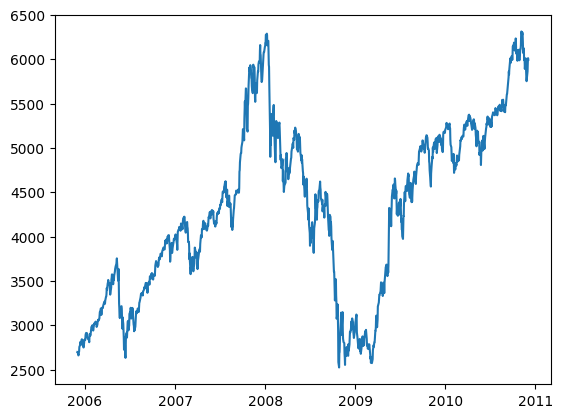

In [29]:
plt.plot(nifty_data['DATE'], nifty_data['Close'])

I've chosen this time period because of the market crash in 2008 and which eventually took considerable time to recover.

We will look at 3 scenarios to understand how investing at different periods can yield different returns. But most importantly understand why staying invested through ups and downs and for multiple years is one of the best ways of building wealth. 

### 1. SIP throughout 5 years

In [21]:
sip_days = nifty_data[nifty_data['WEEK_DAY']=='Friday'].copy(deep=True).reset_index(drop=True)
sip_days['units'] = 5000/sip_days['Close']
sip_days

,Index Name,Date,Open,High,Low,Close,DATE,WEEK_DAY,units
0,NIFTY 50,02-Dec-05,2699.55,2730.70,2691.50,2697.95,2005-12-02,Friday,1.853259
1,NIFTY 50,09-Dec-05,2706.75,2761.10,2698.00,2756.45,2005-12-09,Friday,1.813927
2,NIFTY 50,16-Dec-05,2778.65,2814.90,2766.50,2810.15,2005-12-16,Friday,1.779264
3,NIFTY 50,23-Dec-05,2835.70,2857.00,2799.70,2804.85,2005-12-23,Friday,1.782627
4,NIFTY 50,30-Dec-05,2823.95,2845.55,2812.75,2836.55,2005-12-30,Friday,1.762705
...,...,...,...,...,...,...,...,...,...
240,NIFTY 50,05-Nov-10,6321.85,6338.50,6303.10,6312.45,2010-11-05,Friday,0.792085
241,NIFTY 50,12-Nov-10,6182.30,6202.50,6056.75,6071.65,2010-11-12,Friday,0.823499
242,NIFTY 50,19-Nov-10,6011.30,6013.25,5863.95,5890.30,2010-11-19,Friday,0.848853
243,NIFTY 50,26-Nov-10,5828.55,5838.50,5690.35,5751.95,2010-11-26,Friday,0.869270


In [23]:
sip_days['Close'].iloc[-1]

5992.8

In [26]:
n_years = 5 
last_closing_value = sip_days['Close'].iloc[-1]
total_units = sip_days['units'].sum() 
invested_value = 5000 * sip_days.shape[0]
current_value = total_units * last_closing_value
absolute_returns_prcnt = ((current_value/invested_value)-1)* 100
cagr = ((current_value/invested_value) ** (1/n_years) - 1) * 100

total_units, invested_value, current_value, absolute_returns_prcnt, cagr

(301.55418998166425,
 1225000,
 1807153.9497221175,
 47.52277140588714,
 8.08658923254666)

#### Finding:
Such are the gains of investing in equity indices!

### 2. SIP starting at ATH and checking current value at low point

In [35]:
sip_v2 = nifty_data[(nifty_data['DATE'] >= '2008-01-01') & (nifty_data['DATE'] <= '2009-03-01')].copy(deep=True)
sip_v2 = sip_v2[sip_v2['WEEK_DAY']=='Friday'].copy(deep=True).reset_index(drop=True)
sip_v2['units'] = 5000/sip_v2['Close'] 
sip_v2.tail()

,Index Name,Date,Open,High,Low,Close,DATE,WEEK_DAY,units
53,NIFTY 50,30-Jan-09,2824.05,2881.00,2774.10,2874.80,2009-01-30,Friday,1.739251
54,NIFTY 50,06-Feb-09,2779.35,2852.50,2778.65,2843.10,2009-02-06,Friday,1.758644
55,NIFTY 50,13-Feb-09,2896.95,2969.75,2896.85,2948.35,2009-02-13,Friday,1.695864
56,NIFTY 50,20-Feb-09,2789.30,2789.30,2709.30,2736.45,2009-02-20,Friday,1.827185
57,NIFTY 50,27-Feb-09,2785.70,2787.20,2708.45,2763.65,2009-02-27,Friday,1.809202


In [36]:
n_years = 1.25
last_closing_value = sip_v2['Close'].iloc[-1]
total_units = sip_v2['units'].sum() 
invested_value = 5000 * sip_v2.shape[0]
current_value = total_units * last_closing_value
absolute_returns_prcnt = ((current_value/invested_value)-1)* 100
cagr = ((current_value/invested_value) ** (1/n_years) - 1) * 100

total_units, invested_value, current_value, absolute_returns_prcnt, cagr

(76.12867012629785,
 290000,
 210392.99919454305,
 -27.450689932916184,
 -22.64175128104089)

#### Finding: 
This shows how volatile even the best of the equity indices can be! Also, goes to on show that a decent amount of investment should also be done in fixed income instruments like FDs in case of any emergency situation in such times. 

### 3. SIP starting at ATH and staying invested 

In [37]:
sip_v3 = nifty_data[(nifty_data['DATE'] >= '2008-01-01')].copy(deep=True)
sip_v3 = sip_v3[sip_v3['WEEK_DAY']=='Friday'].copy(deep=True).reset_index(drop=True)
sip_v3['units'] = 5000/sip_v3['Close']
sip_v3.tail()

,Index Name,Date,Open,High,Low,Close,DATE,WEEK_DAY,units
136,NIFTY 50,05-Nov-10,6321.85,6338.50,6303.10,6312.45,2010-11-05,Friday,0.792085
137,NIFTY 50,12-Nov-10,6182.30,6202.50,6056.75,6071.65,2010-11-12,Friday,0.823499
138,NIFTY 50,19-Nov-10,6011.30,6013.25,5863.95,5890.30,2010-11-19,Friday,0.848853
139,NIFTY 50,26-Nov-10,5828.55,5838.50,5690.35,5751.95,2010-11-26,Friday,0.869270
140,NIFTY 50,03-Dec-10,6013.35,6025.40,5964.25,5992.80,2010-12-03,Friday,0.834335


In [39]:
n_years = 3
last_closing_value = sip_v3['Close'].iloc[-1]
total_units = sip_v3['units'].sum() 
invested_value = 5000 * sip_v3.shape[0]
current_value = total_units * last_closing_value
absolute_returns_prcnt = ((current_value/invested_value)-1)* 100
cagr = ((current_value/invested_value) ** (1/n_years) - 1) * 100

total_units, invested_value, current_value, absolute_returns_prcnt, cagr

(162.62199145001458,
 705000,
 974561.0703616474,
 38.23561281725496,
 11.396953551043332)

#### Finding: 
This underlines the importance of staying invested and the value that can be generated!